In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.metrics import log_loss, accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
import seaborn as sns

In [14]:
#データ読み込み
df_ks = pd.read_csv("./ks-projects-201801.csv")

In [15]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

In [16]:
#データ概要
display( df_ks.head() )
display( df_ks.describe() )
display( df_ks.info() )

#各項目の値の種類
for key in df_ks:
    if 'ID' == key : #or 'name' == key:
        continue
    display( '<' + key + '>')
    display( df_ks[key].value_counts() )

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


None

'<name>'

New EP/Music Development                                       41
Canceled (Canceled)                                            13
N/A (Canceled)                                                 11
Music Video                                                    11
Cancelled (Canceled)                                           10
                                                               ..
Machination: A Game of Evil Genius                              1
TransElated: Spreading Peace & Unity Through Fashion            1
ATtiny85 ISP!  Shrink your Arduino projects with ease!          1
Stanky and Amazing Gracie: Illustrated by Kailey Semmelmann     1
On Display                                                      1
Name: name, Length: 375764, dtype: int64

'<category>'

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

'<main_category>'

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

'<currency>'

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

'<deadline>'

2014-08-08    705
2014-08-10    558
2014-08-07    541
2015-05-01    489
2014-08-09    477
             ... 
2010-02-19      1
2009-06-20      1
2009-08-03      1
2009-08-18      1
2009-09-23      1
Name: deadline, Length: 3164, dtype: int64

'<goal>'

5000.0     29779
10000.0    26029
1000.0     16950
3000.0     15743
2000.0     15257
           ...  
2981.0         1
728.0          1
9064.0         1
18350.0        1
15780.0        1
Name: goal, Length: 8353, dtype: int64

'<launched>'

1970-01-01 01:00:00    7
2016-12-21 17:38:09    2
2014-03-18 00:18:10    2
2014-06-26 19:10:03    2
2015-06-15 08:31:14    2
                      ..
2010-06-25 19:27:35    1
2014-02-19 21:27:24    1
2012-09-13 22:29:26    1
2013-04-19 02:42:19    1
2015-05-19 20:33:42    1
Name: launched, Length: 378089, dtype: int64

'<pledged>'

0.00         52527
1.00          9195
10.00         5034
25.00         3994
50.00         3626
             ...  
303.57           1
189983.12        1
7211.70          1
5305.69          1
3026.75          1
Name: pledged, Length: 62130, dtype: int64

'<state>'

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

'<backers>'

0        55609
1        34869
2        23196
3        16063
4        12068
         ...  
2691         1
3712         1
3456         1
74405        1
2047         1
Name: backers, Length: 3963, dtype: int64

'<country>'

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

'<usd pledged>'

0.00        68112
1.00         5341
25.00        3877
10.00        3624
50.00        3141
            ...  
10315.88        1
1615.79         1
13251.25        1
165.94          1
2205.64         1
Name: usd pledged, Length: 95455, dtype: int64

'<usd_pledged_real>'

0.00         52527
1.00          6678
10.00         3633
25.00         3455
50.00         2937
             ...  
103748.00        1
286892.62        1
27235.69         1
10756.22         1
3575.02          1
Name: usd_pledged_real, Length: 106065, dtype: int64

'<usd_goal_real>'

5000.00      24173
10000.00     20786
1000.00      13029
3000.00      12699
2000.00      11915
             ...  
6561.57          1
12346.25         1
2392.95          1
1757.91          1
781250.00        1
Name: usd_goal_real, Length: 50339, dtype: int64

In [17]:
def my_str_len(aName):
  return len(str(aName))

#display( df_ks["name"][0:10])
#display( type( df_ks["name"][0] ) )
df_ks["name_len"] = df_ks["name"].apply(my_str_len)
df_ks["cate_len"] = df_ks["category"].apply(my_str_len)


In [18]:
import datetime

def rested_days(row):
  return ( row["deadline"] - row["launched"] ).days

df_ks["launched"] = df_ks["launched"].apply(pd.to_datetime)
df_ks["deadline"] = df_ks["deadline"].apply(pd.to_datetime)
df_ks["rested_day"] = df_ks.apply(rested_days, axis=1)
display( df_ks.head )

<bound method NDFrame.head of                 ID  ... rested_day
0       1000002330  ...         58
1       1000003930  ...         59
2       1000004038  ...         44
3       1000007540  ...         29
4       1000011046  ...         55
...            ...  ...        ...
378656   999976400  ...         29
378657   999977640  ...         26
378658   999986353  ...         45
378659   999987933  ...         30
378660   999988282  ...         27

[378661 rows x 18 columns]>

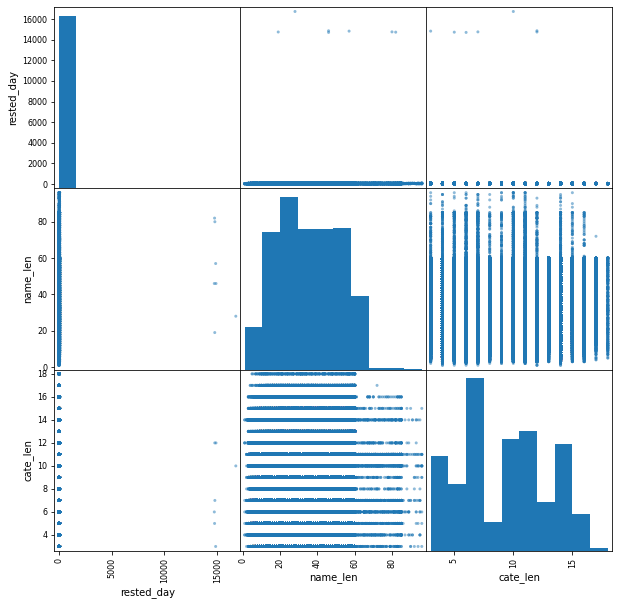

In [19]:
pd.plotting.scatter_matrix(df_ks[["state", "rested_day", "name_len", "cate_len"]], figsize=(10,10))
#pd.plotting.scatter_matrix(df_ks, figsize=(10,10))
plt.show()


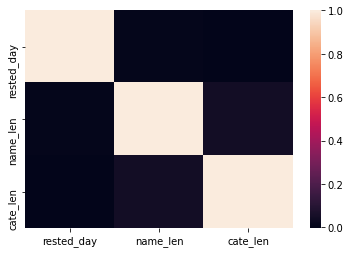

In [20]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_ks[["state", "rested_day", "name_len", "cate_len"]].corr())
plt.show()

In [21]:
# 欠損値を含むレコードを削除
print( '◆欠損値を含むレコード（削除前）' )
print( df_ks.isnull().sum() )
df_ks = df_ks.dropna()
print( '◆欠損値を含むレコード（削除後）' )
print( df_ks.isnull().sum() )

◆欠損値を含むレコード（削除前）
ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
name_len               0
cate_len               0
rested_day             0
dtype: int64
◆欠損値を含むレコード（削除後）
ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
name_len            0
cate_len            0
rested_day          0
dtype: int64


In [22]:
# 'state' の値を failed->False, successful ->True に置き換える
display( df_ks['state'].value_counts() )
df_ks.loc[ df_ks['state'] == 'failed', 'state'] = 0
df_ks.loc[ df_ks['state'] == 'successful', 'state'] = 1

# 'state' の値が False, True いずれでもない行は削除する
drop_index = df_ks.index[ ( df_ks['state'] != 0 ) & ( df_ks['state'] != 1 ) ]
df_ks = df_ks.drop( drop_index )
display( df_ks['state'].value_counts() )

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

0    197611
1    133851
Name: state, dtype: int64

In [23]:
# estimatorにモデルをセット
# 今回は回帰問題であるためLinearRegressionを使用
#estimator = LinearRegression(normalize=False)
X = df_ks[['rested_day', 'name_len', 'cate_len']]
y = df_ks['state'].values.astype('int')
estimator = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)

# RFECVは交差検証によってステップワイズ法による特徴選択を行う
# cvにはFold（=グループ）の数，scoringには評価指標を指定する
# 今回は回帰なのでneg_mean_absolute_errorを評価指標に指定（分類ならaccuracy）
rfecv = RFECV(estimator, cv=10, scoring='accuracy')

# fitで特徴選択を実行
rfecv.fit(X, y)

RFECV(cv=10,
      estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                              early_stopping=False, epsilon=0.1, eta0=0.0,
                              fit_intercept=True, l1_ratio=0.15,
                              learning_rate='optimal', loss='log',
                              max_iter=10000, n_iter_no_change=5, n_jobs=None,
                              penalty='none', power_t=0.5, random_state=1234,
                              shuffle=True, tol=0.001, validation_fraction=0.1,
                              verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [24]:
# 特徴のランキングを表示（1が最も重要な特徴）
print('Feature ranking: \n{}'.format(rfecv.ranking_))

Feature ranking: 
[2 3 1]


In [ ]:
# backers と usd pledged を説明変数として、state を目的変数として学習
X = df_ks[['backers', 'usd pledged']].values
y = df_ks['state'].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重み付けの出力
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}".format(w0, w1, w2))

w0 = -26845.522, w1 = 339.349, w2 = 7.304


In [ ]:
# 予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_est)

# Precision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[1]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[1]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[1]))

対数尤度 = -6.191
正答率 = 82.075%
適合率（Precision） = 81.643%
再現率（Recall） = 71.742%
F1値（F1-score） = 76.373%


In [ ]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), index=['正解 = 0', '正解 = 1'], columns=['予測値 = 0', '予測値 = 1'])
conf_mat

,予測値 = 0,予測値 = 1
正解 = 0,176020,21591
正解 = 1,37824,96027
